In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import geopy
import folium
from tqdm.notebook import trange, tqdm


In [2]:
df = pd.read_csv("./data/AviationData.csv", encoding='cp1252')

/tmp/ipykernel_218878/322594673.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./data/AviationData.csv", encoding='cp1252')


In [3]:
# Drop data where more than 40% of the data is NaN
df.drop(['Latitude', 'Longitude','Air.carrier', 'Aircraft.Category', 'Airport.Code', 'Airport.Name', 'Schedule', 'FAR.Description'], axis='columns', inplace = True)
# remove row with all NaN values
df.dropna(inplace = True)

In [4]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,...,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,Fatal(4),Destroyed,N4988E,Cessna,...,Reciprocating,Personal,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,N2482N,Cessna,...,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,Substantial,N7967Q,Cessna,...,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982


In [5]:
df['total'] = df[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']].sum(axis = 1)

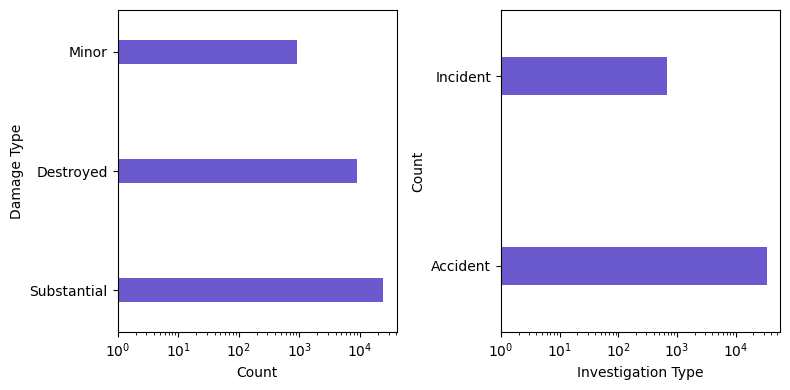

In [6]:
plt.figure(figsize = (8, 4))

plot_count_horizontal = 1
plot_count_vertical = 2
plt.subplot(plot_count_horizontal, plot_count_vertical, 1)
df['Aircraft.damage'].value_counts().plot.barh(log=True, color="slateblue", width=0.2)
plt.ylabel("Damage Type")
plt.xlabel("Count")

plt.subplot(plot_count_horizontal, plot_count_vertical, 2)
df['Investigation.Type'].value_counts().plot.barh(log=True, color="slateblue", width=0.2)
plt.xlabel("Investigation Type")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

In [11]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="location_details", timeout = 3)
location_map = folium.Map()
with tqdm(total=df.shape[0]) as pbar: 
    for location in df['Location']:
        try:
            l = geolocator.geocode(location)
            if l != None:
                location_map.add_child(folium.Marker(location=[l.latitude, l.longitude], popup=location))
        except GeocoderUnavailable:
            break
        pbar.update(1)

  0%|          | 0/34581 [00:00<?, ?it/s]

NameError: name 'GeocoderUnavailable' is not defined

In [12]:
location_map

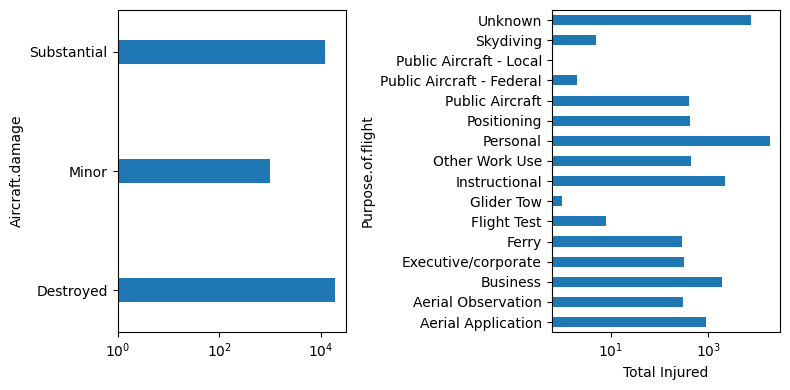

In [46]:
plt.figure(figsize = (8, 4))

plot_count_horizontal = 1
plot_count_vertical = 2

plt.subplot(plot_count_horizontal, plot_count_vertical, 1)
df.groupby('Aircraft.damage')['total'].sum().plot.barh(log = True, width = 0.2)

plt.subplot(plot_count_horizontal, plot_count_vertical, 2)
df.groupby('Purpose.of.flight')['total'].sum().plot.barh(log = True)
plt.xlabel("Total Injured")

plt.tight_layout()

plt.show()